<a href="https://colab.research.google.com/github/rosehelfrich/Ky_School_data/blob/main/Summarize_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Column / Row options
pd.options.display.max_columns = None
pd.options.display.max_rows = 20

# Two decimal places and the thousands separator
pd.options.display.float_format = '{:,.2f}'.format

# Reset float format
#pd.reset_option('display.float_format')

In [4]:
predict_df = pd.read_csv('/content/drive/MyDrive/Colab Data/KY EPSB/All Years/predict_df.csv')

In [5]:
# Excluding the 2022 year so we can get the pre-covid trend. 

trends_df = predict_df[predict_df['End Year'] != 2022]
trends_df.reset_index(drop= True, inplace= True)

# Summarize School Data

## Avg Spending

In [6]:
school_spending = predict_df.groupby(['School Code']).mean().loc[:,['Reported Spending per student', 
                                                                    'Money Difference per school',
                                                                    'Money Difference per student', 
                                                                    'Estimated Spending per student']]

school_spending.dropna(inplace=True) # Drops 13 schools

In [7]:
school_spending.columns =  ['Reported Spending based on district teacher experience', # Mandated reported average per student per year based on average teacher experience throughout the entire district
                            'Money Difference per school', # average per year
                            'Money Difference per student', # average per student per year
                            'Estimated Spending based on school teacher experience'] #  average per student per year

## AST Proficency with pivot table

In [8]:
pivot_df = predict_df.pivot(index=['School Code'], columns='End Year', values='Proficiency Rate')

In [9]:
# We want the pre-covid classifcation, not the post covid classfication

school_summary = trends_df.sort_values(by='End Year', ascending=False).loc[:,['District', 'School Code', 'School', 'Classification']]

school_summary.drop_duplicates(subset='School Code', inplace=True)

#Set index to school code
school_summary.set_index(['School Code'], inplace=True)

# Rename classification column to be more accurate
school_summary.columns = ['District', 'School', 'Pre-covid Classification']

In [10]:
# Join school summary data with the pivot_df

school_summary = school_summary.join(pivot_df, how='outer')

## Add type, title 1 status & locations

In [11]:
# Join with the school spending data. 
school_summary = school_summary.join(school_spending, how='outer')

In [12]:
# Drops the rows where 5 or more values are not missing
school_summary.dropna(axis=0, thresh=5, inplace=True) # This drops 13 schools

In [13]:
# Add in school locations
school_locations = pd.read_csv('/content/drive/MyDrive/Colab Data/KY EPSB/All Years/school_locations_2022.csv')

school_info = school_locations.loc[:,['School Code', 'Title I Status', 'Latitude', 'Longitude']]

school_info.set_index(['School Code'], inplace=True)

In [14]:
school_summary = school_summary.join(school_info, how='left')

## Correlations

In [15]:
# Converts & rounds to integers
def round_df_to_float(df, column_list):
  for column in column_list:
    df[column] = pd.to_numeric(df[column], errors='ignore')
    df = df.round({column:-1})
  return(df)

In [16]:
col_school = ['Reported Spending based on district teacher experience',
              'Money Difference per school', 
              'Money Difference per student', 
              'Estimated Spending based on school teacher experience']

In [17]:
school_summary = round_df_to_float(school_summary, col_school)

In [18]:
school_summary

,District,School,Pre-covid Classification,2012,2013,2014,2015,2016,2017,2018,2019,2022,Reported Spending based on district teacher experience,Money Difference per school,Money Difference per student,Estimated Spending based on school teacher experience,Title I Status,Latitude,Longitude
School Code,,,,,,,,,,,,,,,,,,,
1010,Adair County,Adair County High School,Proficient,55.00,54.00,69.00,71.00,72.00,60.00,57.00,70.00,61.00,"9,360.00","-12,790.00",-20.00,"9,340.00",Title 1 Eligible - Schoolwide School,37.11,-85.33
1014,Adair County,Adair County Middle School,Distinguished,48.00,53.00,62.00,63.00,68.00,65.00,73.00,68.00,55.00,"8,620.00","-8,210.00",-20.00,"8,600.00",Title 1 Eligible - Schoolwide School,37.10,-85.32
1016,Adair County,Adair County Elementary School,Proficient,63.00,63.00,63.00,60.00,69.00,71.00,67.00,69.00,54.00,"9,620.00",640.00,0.00,"9,620.00",Title 1 Eligible - Schoolwide School,37.11,-85.33
1020,Adair County,Adair County Primary Center,Proficient,NaN,NaN,NaN,NaN,NaN,NaN,67.00,69.00,54.00,"12,950.00","22,300.00",40.00,"12,990.00",Title 1 Eligible - Schoolwide School,37.11,-85.33
5010,Allen County,Allen County Primary Center,Needs Improvement,50.00,59.00,70.00,68.00,71.00,76.00,75.00,65.00,55.00,"11,740.00","134,760.00",150.00,"11,890.00",Title 1 Eligible - Schoolwide School,36.75,-86.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601050,Woodford County,Southside Elementary School,Distinguished,62.00,67.00,78.00,78.00,74.00,82.00,79.00,70.00,73.00,"10,720.00","70,760.00",140.00,"10,860.00",Title 1 Eligible - Schoolwide School,38.04,-84.72
601075,Woodford County,Simmons Elementary School,Distinguished,54.00,55.00,68.00,64.00,71.00,76.00,80.00,68.00,69.00,"12,060.00","-14,650.00",-30.00,"12,030.00",Title 1 Eligible - Schoolwide School,38.05,-84.75
601084,Woodford County,Woodford County High School,Distinguished,63.00,70.00,80.00,81.00,81.00,82.00,69.00,77.00,66.00,"9,490.00","28,960.00",20.00,"9,520.00",Not a Title 1 School,38.06,-84.73


In [19]:
school_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1130 entries, 1010 to 601120
Data columns (total 19 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   District                                                1130 non-null   object 
 1   School                                                  1130 non-null   object 
 2   Pre-covid Classification                                1130 non-null   object 
 3   2012                                                    1069 non-null   float64
 4   2013                                                    1072 non-null   float64
 5   2014                                                    1080 non-null   float64
 6   2015                                                    1088 non-null   float64
 7   2016                                                    1091 non-null   float64
 8   2017                             

In [20]:
school_summary.nunique()

District                                                   170
School                                                    1106
Pre-covid Classification                                     3
2012                                                        53
2013                                                        52
2014                                                        48
2015                                                        44
2016                                                        52
2017                                                        72
2018                                                        82
2019                                                        64
2022                                                        77
Reported Spending based on district teacher experience     558
Money Difference per school                               1105
Money Difference per student                               111
Estimated Spending based on school teacher experience  

In [21]:
school_summary.corr()

,2012,2013,2014,2015,2016,2017,2018,2019,2022,Reported Spending based on district teacher experience,Money Difference per school,Money Difference per student,Estimated Spending based on school teacher experience,Latitude,Longitude
2012,1.00,0.79,0.71,0.66,0.52,0.65,0.63,0.60,0.64,-0.30,0.33,0.31,-0.27,0.00,-0.15
2013,0.79,1.00,0.81,0.76,0.62,0.64,0.58,0.62,0.67,-0.27,0.33,0.28,-0.25,-0.03,-0.09
2014,0.71,0.81,1.00,0.81,0.66,0.65,0.56,0.60,0.66,-0.25,0.33,0.29,-0.23,-0.05,-0.10
2015,0.66,0.76,0.81,1.00,0.69,0.64,0.52,0.62,0.68,-0.25,0.37,0.32,-0.22,-0.05,-0.09
2016,0.52,0.62,0.66,0.69,1.00,0.67,0.55,0.62,0.66,-0.18,0.32,0.28,-0.16,-0.10,-0.01
2017,0.65,0.64,0.65,0.64,0.67,1.00,0.89,0.75,0.73,-0.31,0.33,0.34,-0.28,-0.07,0.03
2018,0.63,0.58,0.56,0.52,0.55,0.89,1.00,0.76,0.71,-0.30,0.30,0.30,-0.28,-0.08,0.01
2019,0.60,0.62,0.60,0.62,0.62,0.75,0.76,1.00,0.78,-0.31,0.32,0.30,-0.28,-0.13,0.02
2022,0.64,0.67,0.66,0.68,0.66,0.73,0.71,0.78,1.00,-0.30,0.27,0.26,-0.28,-0.10,-0.02
Reported Spending based on district teacher experience,-0.30,-0.27,-0.25,-0.25,-0.18,-0.31,-0.30,-0.31,-0.30,1.00,-0.16,-0.17,1.00,0.03,0.05


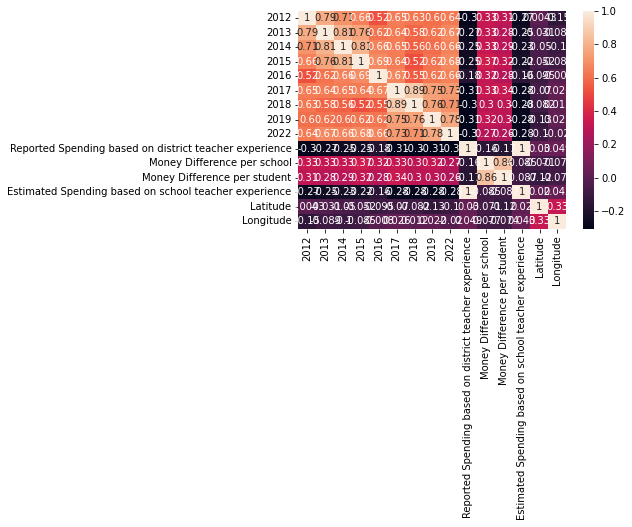

In [22]:
sns.heatmap(school_summary.corr(), annot=True)

In [23]:
school_summary.to_csv('/content/drive/MyDrive/Colab Data/KY EPSB/All Years/school_summary.csv')

In [24]:
pd.read_csv('/content/drive/MyDrive/Colab Data/KY EPSB/All Years/school_summary.csv')

,School Code,District,School,Pre-covid Classification,2012,2013,2014,2015,2016,2017,2018,2019,2022,Reported Spending based on district teacher experience,Money Difference per school,Money Difference per student,Estimated Spending based on school teacher experience,Title I Status,Latitude,Longitude
0,1010,Adair County,Adair County High School,Proficient,55.00,54.00,69.00,71.00,72.00,60.00,57.00,70.00,61.00,"9,360.00","-12,790.00",-20.00,"9,340.00",Title 1 Eligible - Schoolwide School,37.11,-85.33
1,1014,Adair County,Adair County Middle School,Distinguished,48.00,53.00,62.00,63.00,68.00,65.00,73.00,68.00,55.00,"8,620.00","-8,210.00",-20.00,"8,600.00",Title 1 Eligible - Schoolwide School,37.10,-85.32
2,1016,Adair County,Adair County Elementary School,Proficient,63.00,63.00,63.00,60.00,69.00,71.00,67.00,69.00,54.00,"9,620.00",640.00,0.00,"9,620.00",Title 1 Eligible - Schoolwide School,37.11,-85.33
3,1020,Adair County,Adair County Primary Center,Proficient,NaN,NaN,NaN,NaN,NaN,NaN,67.00,69.00,54.00,"12,950.00","22,300.00",40.00,"12,990.00",Title 1 Eligible - Schoolwide School,37.11,-85.33
4,5010,Allen County,Allen County Primary Center,Needs Improvement,50.00,59.00,70.00,68.00,71.00,76.00,75.00,65.00,55.00,"11,740.00","134,760.00",150.00,"11,890.00",Title 1 Eligible - Schoolwide School,36.75,-86.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1125,601050,Woodford County,Southside Elementary School,Distinguished,62.00,67.00,78.00,78.00,74.00,82.00,79.00,70.00,73.00,"10,720.00","70,760.00",140.00,"10,860.00",Title 1 Eligible - Schoolwide School,38.04,-84.72
1126,601075,Woodford County,Simmons Elementary School,Distinguished,54.00,55.00,68.00,64.00,71.00,76.00,80.00,68.00,69.00,"12,060.00","-14,650.00",-30.00,"12,030.00",Title 1 Eligible - Schoolwide School,38.05,-84.75
1127,601084,Woodford County,Woodford County High School,Distinguished,63.00,70.00,80.00,81.00,81.00,82.00,69.00,77.00,66.00,"9,490.00","28,960.00",20.00,"9,520.00",Not a Title 1 School,38.06,-84.73
1128,601090,Woodford County,Huntertown Elementary School,Proficient,65.00,60.00,77.00,76.00,80.00,90.00,86.00,67.00,75.00,"10,850.00","115,620.00",250.00,"11,090.00",Title 1 Eligible - Schoolwide School,38.04,-84.71


## KY AST Goals

In [25]:
raw_goals_october_2022 = pd.read_csv('/content/drive/MyDrive/Colab Data/KY EPSB/2021-2022/progress_towards_state_goals_proficiency_2022.csv')

goals_oct_2022 = raw_goals_october_2022.loc[:,['SCHOOL CODE', 'GOAL PERFORMANCE 2021',
                                               'GOAL PERFORMANCE 2022', 'GOAL PERFORMANCE 2023', 'GOAL PERFORMANCE 2024', 
                                               'GOAL PERFORMANCE 2025', 'GOAL PERFORMANCE 2026', 'GOAL PERFORMANCE 2027',
                                               'GOAL PERFORMANCE 2028', 'GOAL PERFORMANCE 2029', 'GOAL PERFORMANCE 2030']]

goals_oct_2022.columns = ['School Code', '2021 Goal', '2022 Goal', 
                          '2023 Goal', '2024 Goal', '2025 Goal', '2026 Goal', '2027 Goal',
                          '2028 Goal', '2029 Goal', '2030 Goal']

# Drops rows without goals
goals_oct_2022.replace({'--': None}, inplace=True)
goals_oct_2022.dropna(inplace=True)

#Reset index
#goals_oct_2022.reset_index(drop=True, inplace=True)

In [26]:
goals_oct_2022 = goals_oct_2022.groupby(['School Code']).mean()

In [27]:
goals_oct_2022

,2021 Goal,2022 Goal,2023 Goal,2024 Goal,2025 Goal,2026 Goal,2027 Goal,2028 Goal,2029 Goal,2030 Goal
School Code,,,,,,,,,,
1010,38.02,40.85,43.67,46.48,49.27,52.12,54.95,57.73,60.57,63.38
1014,41.95,44.62,47.22,49.90,52.48,55.15,57.80,60.42,63.08,65.70
1016,45.48,47.98,50.45,52.90,55.38,57.88,60.38,62.83,65.30,67.80
5010,44.30,46.80,49.40,51.90,54.40,57.00,59.50,62.00,64.60,67.10
5015,42.22,44.85,47.47,50.08,52.70,55.32,58.02,60.62,63.25,65.88
...,...,...,...,...,...,...,...,...,...,...
601075,50.42,52.67,54.90,57.20,59.45,61.67,63.92,66.20,68.42,70.70
601084,51.30,53.52,55.70,57.98,60.17,62.38,64.58,66.80,69.00,71.25
601085,61.42,63.17,64.92,66.67,68.45,70.20,71.92,73.70,75.45,77.22


In [28]:
# Converts & rounds to integers

def round_df_to_integer(df, column_list):
  for column in column_list:
    df[column] = pd.to_numeric(df[column])
    df = df.round({column:0})
    df[column] = df[column].astype(int)
  return(df)

In [29]:
# Execute integers conversion/ round
goal_columns = ['2021 Goal', '2022 Goal', '2023 Goal', '2024 Goal', 
                '2025 Goal', '2026 Goal', '2027 Goal', '2028 Goal', '2029 Goal', '2030 Goal']

goals_oct_2022 = round_df_to_integer(goals_oct_2022, goal_columns)

## Slope and Intercept

In [30]:
df_slope = school_summary.dropna(axis=0)
df_school_details = df_slope.join(goals_oct_2022, how='left')
df_school_details.sort_index(inplace=True)
df_school_details.reset_index(drop=False, inplace=True)

In [31]:
# Find the slope, intercept for each school based on pre-covid data
slopes = []
intercepts = []  

for i in df_school_details.index:
  x_values = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
  y_values = df_school_details.iloc[[i], 4:12].values[0]
  slope, init_intercept = np.polyfit(x_values, y_values, 1)
  score_2022 = df_school_details[2022][i]
  intercept = score_2022 - (slope * 2022) 
   
  slopes.append(slope)
  intercepts.append(intercept)

# Put slopes, intercepts into school_summary
df_school_details['Proficiency slope'] = slopes
df_school_details['Proficiency intercept'] = intercepts

In [32]:
df_school_details[df_school_details['Proficiency slope'] < 0]

,School Code,District,School,Pre-covid Classification,2012,2013,2014,2015,2016,2017,2018,2019,2022,Reported Spending based on district teacher experience,Money Difference per school,Money Difference per student,Estimated Spending based on school teacher experience,Title I Status,Latitude,Longitude,2021 Goal,2022 Goal,2023 Goal,2024 Goal,2025 Goal,2026 Goal,2027 Goal,2028 Goal,2029 Goal,2030 Goal,Proficiency slope,Proficiency intercept
51,32020,Bellevue Independent,Grandview Elementary School,Needs Improvement,59.00,49.00,67.00,65.00,52.00,55.00,61.00,50.00,32.00,"10,430.00","11,080.00",20.00,"10,460.00",Title 1 Eligible - Schoolwide School,39.10,-84.48,35.00,38.00,41.00,44.00,47.00,50.00,53.00,56.00,59.00,62.00,-0.62,"1,283.71"
55,35005,Boone County,A M Yealey Elementary School,Proficient,62.00,62.00,68.00,63.00,60.00,62.00,71.00,57.00,60.00,"9,700.00","86,660.00",160.00,"9,860.00",Title 1 Eligible - Schoolwide School,38.99,-84.66,37.00,40.00,43.00,46.00,49.00,52.00,54.00,57.00,60.00,63.00,-0.13,324.79
62,35020,Boone County,Rector A. Jones Middle School,Needs Improvement,47.00,48.00,58.00,57.00,60.00,52.00,49.00,44.00,37.00,"8,850.00","-147,180.00",-210.00,"8,640.00",Title 1 Eligible - Schoolwide School,38.99,-84.62,19.00,22.00,26.00,30.00,33.00,37.00,41.00,45.00,48.00,52.00,-0.37,783.21
68,35050,Boone County,Florence Elementary School,Needs Improvement,55.00,57.00,72.00,64.00,66.00,59.00,53.00,62.00,58.00,"9,530.00","-118,050.00",-210.00,"9,320.00",Title 1 Eligible - Schoolwide School,39.00,-84.63,33.00,36.00,39.00,42.00,45.00,48.00,51.00,54.00,57.00,60.00,-0.10,250.57
70,35065,Boone County,Hillard Collins Elementary School,Needs Improvement,54.00,44.00,60.00,55.00,53.00,49.00,48.00,52.00,56.00,"9,140.00","-141,810.00",-180.00,"8,960.00",Title 1 Eligible - Schoolwide School,38.99,-84.62,25.00,28.00,32.00,35.00,38.00,42.00,45.00,49.00,52.00,56.00,-0.35,754.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,571130,Warren County,Oakland Elementary,Needs Improvement,51.00,47.00,65.00,60.00,55.00,47.00,49.00,45.00,48.00,"10,790.00","42,740.00",160.00,"10,940.00",Title 1 Eligible - Schoolwide School,37.04,-86.25,20.00,24.00,27.00,31.00,34.00,38.00,42.00,45.00,49.00,53.00,-1.08,"2,238.50"
1024,571150,Warren County,Richardsville Elementary,Needs Improvement,51.00,52.00,67.00,57.00,69.00,53.00,48.00,48.00,46.00,"9,940.00","72,740.00",180.00,"10,120.00",Title 1 Eligible - Schoolwide School,37.10,-86.47,22.00,25.00,29.00,33.00,36.00,40.00,43.00,47.00,50.00,54.00,-0.85,"1,755.07"
1034,575074,Washington County,Washington County High School,Needs Improvement,49.00,62.00,68.00,70.00,71.00,45.00,54.00,59.00,62.00,"9,710.00","10,140.00",20.00,"9,730.00",Title 1 Eligible - Schoolwide School,37.71,-85.21,31.00,34.00,37.00,40.00,43.00,46.00,50.00,53.00,56.00,59.00,-0.45,976.71
1037,581200,Wayne County,Wayne County High School,Needs Improvement,58.00,70.00,74.00,76.00,70.00,60.00,61.00,65.00,59.00,"9,020.00","-1,290.00",-10.00,"9,020.00",Title 1 Eligible - No Program,36.83,-84.87,37.00,39.00,42.00,45.00,48.00,51.00,54.00,57.00,60.00,62.00,-0.52,"1,118.14"


In [33]:
df_school_details.to_csv('/content/drive/MyDrive/Colab Data/KY EPSB/All Years/detailed_df_by_school.csv', index=False)

In [34]:
pd.read_csv('/content/drive/MyDrive/Colab Data/KY EPSB/All Years/detailed_df_by_school.csv')

,School Code,District,School,Pre-covid Classification,2012,2013,2014,2015,2016,2017,2018,2019,2022,Reported Spending based on district teacher experience,Money Difference per school,Money Difference per student,Estimated Spending based on school teacher experience,Title I Status,Latitude,Longitude,2021 Goal,2022 Goal,2023 Goal,2024 Goal,2025 Goal,2026 Goal,2027 Goal,2028 Goal,2029 Goal,2030 Goal,Proficiency slope,Proficiency intercept
0,1010,Adair County,Adair County High School,Proficient,55.00,54.00,69.00,71.00,72.00,60.00,57.00,70.00,61.00,"9,360.00","-12,790.00",-20.00,"9,340.00",Title 1 Eligible - Schoolwide School,37.11,-85.33,38.00,41.00,44.00,46.00,49.00,52.00,55.00,58.00,61.00,63.00,1.12,"-2,201.71"
1,1014,Adair County,Adair County Middle School,Distinguished,48.00,53.00,62.00,63.00,68.00,65.00,73.00,68.00,55.00,"8,620.00","-8,210.00",-20.00,"8,600.00",Title 1 Eligible - Schoolwide School,37.10,-85.32,42.00,45.00,47.00,50.00,52.00,55.00,58.00,60.00,63.00,66.00,3.02,"-6,059.14"
2,1016,Adair County,Adair County Elementary School,Proficient,63.00,63.00,63.00,60.00,69.00,71.00,67.00,69.00,54.00,"9,620.00",640.00,0.00,"9,620.00",Title 1 Eligible - Schoolwide School,37.11,-85.33,45.00,48.00,50.00,53.00,55.00,58.00,60.00,63.00,65.00,68.00,1.13,"-2,232.79"
3,5010,Allen County,Allen County Primary Center,Needs Improvement,50.00,59.00,70.00,68.00,71.00,76.00,75.00,65.00,55.00,"11,740.00","134,760.00",150.00,"11,890.00",Title 1 Eligible - Schoolwide School,36.75,-86.22,44.00,47.00,49.00,52.00,54.00,57.00,60.00,62.00,65.00,67.00,2.45,"-4,903.71"
4,5015,Allen County,James E Bazzell Middle School,Distinguished,57.00,58.00,71.00,69.00,74.00,75.00,79.00,67.00,58.00,"13,210.00","61,100.00",140.00,"13,350.00",Title 1 Eligible - Schoolwide School,36.75,-86.21,42.00,45.00,47.00,50.00,53.00,55.00,58.00,61.00,63.00,66.00,2.29,"-4,563.71"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,601050,Woodford County,Southside Elementary School,Distinguished,62.00,67.00,78.00,78.00,74.00,82.00,79.00,70.00,73.00,"10,720.00","70,760.00",140.00,"10,860.00",Title 1 Eligible - Schoolwide School,38.04,-84.72,53.00,56.00,58.00,60.00,62.00,64.00,66.00,68.00,70.00,72.00,1.48,"-2,911.86"
1061,601075,Woodford County,Simmons Elementary School,Distinguished,54.00,55.00,68.00,64.00,71.00,76.00,80.00,68.00,69.00,"12,060.00","-14,650.00",-30.00,"12,030.00",Title 1 Eligible - Schoolwide School,38.05,-84.75,50.00,53.00,55.00,57.00,59.00,62.00,64.00,66.00,68.00,71.00,3.02,"-6,045.14"
1062,601084,Woodford County,Woodford County High School,Distinguished,63.00,70.00,80.00,81.00,81.00,82.00,69.00,77.00,66.00,"9,490.00","28,960.00",20.00,"9,520.00",Not a Title 1 School,38.06,-84.73,51.00,54.00,56.00,58.00,60.00,62.00,65.00,67.00,69.00,71.00,1.18,"-2,317.07"
1063,601090,Woodford County,Huntertown Elementary School,Proficient,65.00,60.00,77.00,76.00,80.00,90.00,86.00,67.00,75.00,"10,850.00","115,620.00",250.00,"11,090.00",Title 1 Eligible - Schoolwide School,38.04,-84.71,54.00,56.00,58.00,61.00,63.00,65.00,67.00,69.00,71.00,73.00,2.23,"-4,426.36"


# School Graphs

In [35]:
df_school_details.dropna(inplace=True)
df_school_details.reset_index(drop=True, inplace=True)

In [36]:
# Round Test scores to integers
def round_df(df, column_list):
  for column in column_list:
    df = df.round({column:0})
    df[column] = df[column].astype(int)
  return(df)

In [37]:
test_scores_cols = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2022]

df_school_details = round_df(df_school_details, test_scores_cols)

In [38]:
def test_trend(school_index):
  x_trend = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
  y_trend = df_school_details.iloc[[school_index],4:12].values[0]
  sns.regplot(x = x_trend, y = y_trend, fit_reg=True, ci=None)
  
  school = df_school_details.at[school_index, 'School']
  district = df_school_details.at[school_index, 'District']

  plt.xlim(2012, 2020)
  plt.ylim(15, 115)
  plt.xlabel('Year')
  plt.ylabel('Proficiency Scores')
  plt.title(("%s \n"%school)+ ("District: %s \n Test Trend"%district))
  plt.gca().legend(('Pre-covid Test Trend','Test scores'), loc='best')
  plt.show()

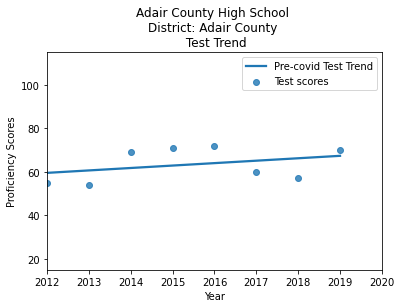

In [39]:
test_trend(0)

In [40]:
def test_scores(school_index):
  x_scores = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2022]
  y_scores = df_school_details.iloc[[school_index],4:13].values[0]
  plt.scatter(x_scores, y_scores, marker="D")
  
  school = df_school_details.at[school_index, 'School']
  district = df_school_details.at[school_index, 'District']

  plt.xlim(2011, 2023)
  plt.ylim(15, 115)
  plt.xlabel('Year')
  plt.ylabel('Proficiency Scores')
  plt.title(("%s \n"%school)+ ("District: %s \n Test Scores"%district))
  plt.gca().legend(('Test Scores',), loc='best')
  plt.show()

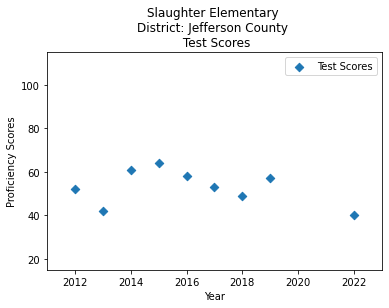

In [41]:
test_scores(540)

In [42]:
def score_predictions(school_index):
  x_pred = [2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]
  slope = df_school_details.at[school_index, 'Proficiency slope']
  intercept = df_school_details.at[school_index, 'Proficiency intercept']
  y_pred = [slope * year + intercept for year in x_pred]
  plt.plot(x_pred, y_pred, linestyle='dashed')
  
  # 2022 Test score
  x_score_2022 = [2022]
  y_score_2022 = df_school_details.iloc[[school_index],12].values[0]
  plt.scatter(x_score_2022, y_score_2022, marker="D")


  school = df_school_details.at[school_index, 'School']
  district = df_school_details.at[school_index, 'District']
  plt.xlim(2021, 2030)
  plt.ylim(15, 115)
  plt.xlabel('Year')
  plt.ylabel('Proficiency Scores')
  plt.title(("%s \n"%school)+ ("District: %s \n Test Predictions \n (Based on school trend and 2022 test score)"%district))
  plt.gca().legend(('Predictions',), loc='best')
  plt.show()

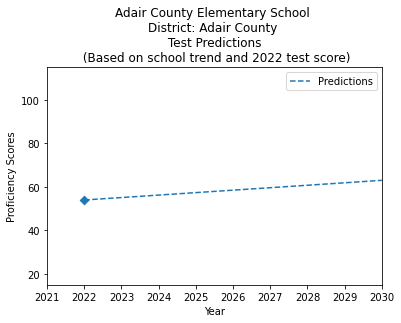

In [43]:
score_predictions(2)

In [44]:
def school_goals(school_index):
  # Test Scores - scatter
  x_scores = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2022]
  y_scores = df_school_details.iloc[[school_index],4:13].values[0]
  plt.scatter(x_scores, y_scores)
  
  # School Goals
  x_goals = [2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]
  y_goals = df_school_details.iloc[[school_index],20:30].values[0]
  plt.scatter(x_goals, y_goals, marker="x")

  school = df_school_details.at[school_index, 'School']
  district = df_school_details.at[school_index, 'District']

  plt.xlim(2012, 2030)
  plt.ylim(15, 115)
  plt.xlabel('Year')
  plt.ylabel('Proficiency Scores')
  plt.title(("%s \n"%school)+ ("District: %s \n Test Scores and Goals"%district))
  plt.gca().legend(('Test Scores', 'School Goals (published Oct 2022)',), loc='best')
  plt.show()

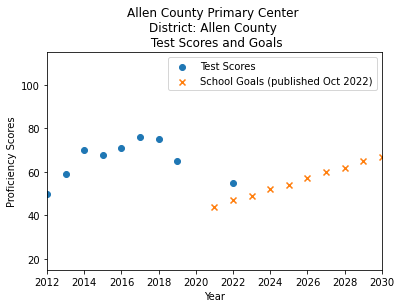

In [45]:
school_goals(3)

In [46]:
def school_combin(school_index):
  # Test Trend - precovid
  x_trend = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
  y_trend = df_school_details.iloc[[school_index],4:12].values[0]
  sns.regplot(x = x_trend, y = y_trend, fit_reg=True, ci=None, marker="D")
  
  # Test Scores - scatter
  x_scores = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2022]
  y_scores = df_school_details.iloc[[school_index],4:13].values[0]
  plt.scatter(x_scores, y_scores)

  # Predict future scores
  x_pred = [2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]
  slope = df_school_details.at[school_index, 'Proficiency slope']
  intercept = df_school_details.at[school_index, 'Proficiency intercept']
  y_pred = [slope * year + intercept for year in x_pred]
  plt.plot(x_pred, y_pred, linestyle='dashed')


  # Labels
  school = df_school_details.at[school_index, 'School']
  district = df_school_details.at[school_index, 'District']
  plt.xlim(2012, 2030)
  plt.ylim(15, 115)
  plt.xlabel('Year')
  plt.ylabel('Proficiency Scores')
  plt.title(("%s \n"%school)+ ("District: %s \n Test Trend and Predictions"%district))
  plt.gca().legend(('Test Trend (pre-covid)','Prediction Line', 'Test Scores'), loc='best')
  plt.show()

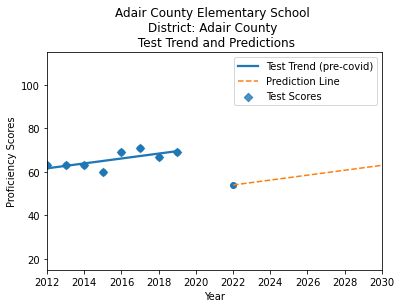

In [47]:
school_combin(2)

In [48]:
df_school_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 32 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   School Code                                             1064 non-null   int64  
 1   District                                                1064 non-null   object 
 2   School                                                  1064 non-null   object 
 3   Pre-covid Classification                                1064 non-null   object 
 4   2012                                                    1064 non-null   int64  
 5   2013                                                    1064 non-null   int64  
 6   2014                                                    1064 non-null   int64  
 7   2015                                                    1064 non-null   int64  
 8   2016                                  

# Aggregate District Data

In [49]:
agg_district_data = predict_df.groupby(['District', 'End Year']).agg({'Proficiency Rate': ['mean', 'min', 'max'],
                                      'Reported Spending per student': ['mean'],
                                      'Money Difference per school': ['min', 'max']
                                       })

agg_district_data.columns = ['Average Proficiency Score', 
                             'Minimum Proficiency Score',
                             'Maximum Proficiency Score',
                             'Average Reported Spending (per student)',
                             'Minimum Money Difference (estimated)',
                             'Maximum Money Difference (estimated)']

agg_district_data.reset_index(drop=False, inplace=True)

In [50]:
agg_district_data

,District,End Year,Average Proficiency Score,Minimum Proficiency Score,Maximum Proficiency Score,Average Reported Spending (per student),Minimum Money Difference (estimated),Maximum Money Difference (estimated)
0,Adair County,2012,55.33,48,63,"6,813.33","-55,700.00","-33,800.00"
1,Adair County,2013,56.67,53,63,"6,830.00","-37,000.00","-21,200.00"
2,Adair County,2014,64.67,62,69,"6,946.67","-13,100.00","-11,300.00"
3,Adair County,2015,64.67,60,71,"9,400.00","-42,100.00","24,800.00"
4,Adair County,2016,69.67,68,72,"9,900.00","-19,200.00","38,300.00"
...,...,...,...,...,...,...,...,...
1520,Woodford County,2016,73.20,60,81,"10,880.00","28,600.00","173,200.00"
1521,Woodford County,2017,81.00,75,90,"10,372.00","4,800.00","161,700.00"
1522,Woodford County,2018,77.40,69,86,"12,762.00","8,300.00","80,800.00"
1523,Woodford County,2019,71.60,67,77,"11,334.00","6,600.00","74,600.00"
